In [ ]:
# 윈도우
%matplotlib notebook
import warnings
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.font_manager import fontManager
import squarify
import matplotlib

for font in fontManager.ttflist:
    if 'Na' in font.name:
        print(font.name)
        
warnings.filterwarnings(action='ignore')
plt.rc('font', family='08SeoulNamsan')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'

In [22]:
#맥
import pandas as pd
import warnings
import missingno as msno
import numpy as np
import os
import matplotlib
from scipy import stats
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import squarify 
from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore')

os.chdir('/Users/hankiho/Downloads/weather-master/유통&소셜 데이터')

In [23]:
weather = pd.read_csv("weather.csv", encoding ='CP949', parse_dates=['date.wt'])
la = pd.read_csv("lala.csv", encoding ='CP949', parse_dates=['date.la'])
gs_seoul = la[la['reg_01.la']=='서울특별시']
gs = gs_seoul

In [24]:
### 코드 복붙을 위해 lala데이터를 gs로 바꿨습니다.
gs = gs.rename(columns = {'reg_01.la': 'reg_01.gs'})
gs = gs.rename(columns = {'reg_02.la': 'reg_02.gs'})
gs = gs.rename(columns = {'gen.la': 'gen.gs'})
gs = gs.rename(columns = {'date.la': 'date.gs'})
gs = gs.rename(columns = {'age.la': 'age.gs'})
gs = gs.rename(columns = {'cat.la': 'cat.gs'})
gs = gs.rename(columns = {'qty.la': 'qty.gs'})
gs_seoul = gs

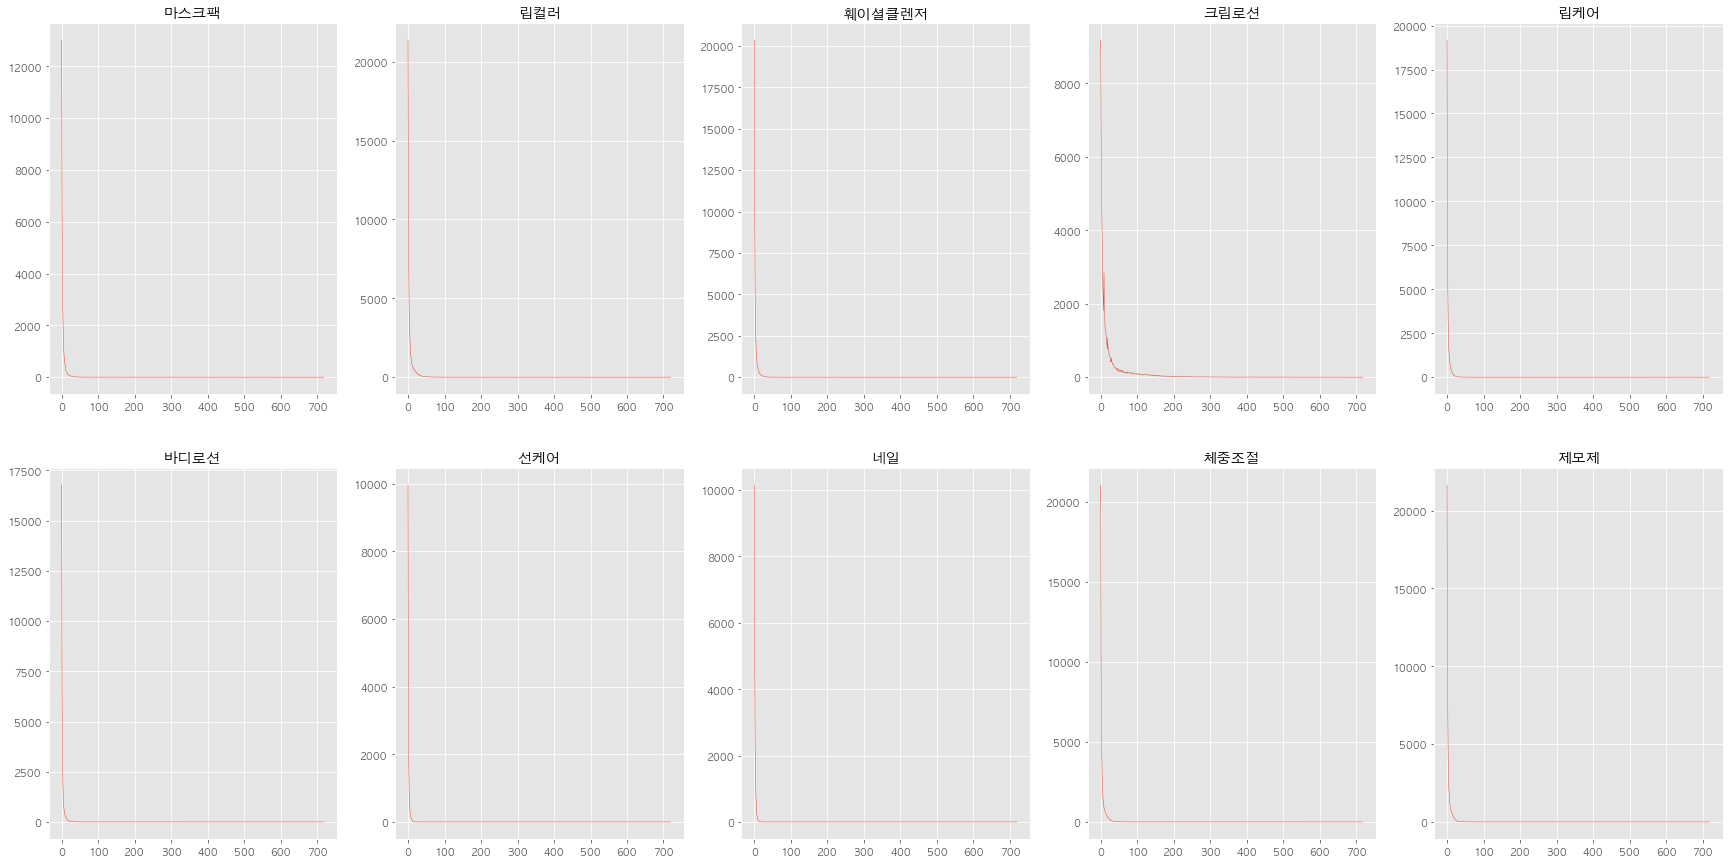

In [25]:
name = pd.Series(['마스크팩','립컬러','훼이셜클렌저','크림로션','립케어',                  
                  '바디로션','선케어','네일','체중조절','제모제'])

plt.rcParams["figure.figsize"] = (30,15)
plt.figure()
gs_seoul_count = gs_seoul.groupby(['qty.gs','cat.gs'])['cat.gs'].count().unstack().reset_index().fillna(0)
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.title(name[i-1])
    #plt.text(250,10000,'왜도: ')
    #plt.text(250,8500,'첨도: ')
    #plt.text(300,10000, gs_seoul_count_skew.iloc[i,1])
    #plt.text(300,8500, gs_seoul_count_kurt.iloc[i,1])
    value=gs_seoul_count.iloc[:,i]
    plt.plot(value)

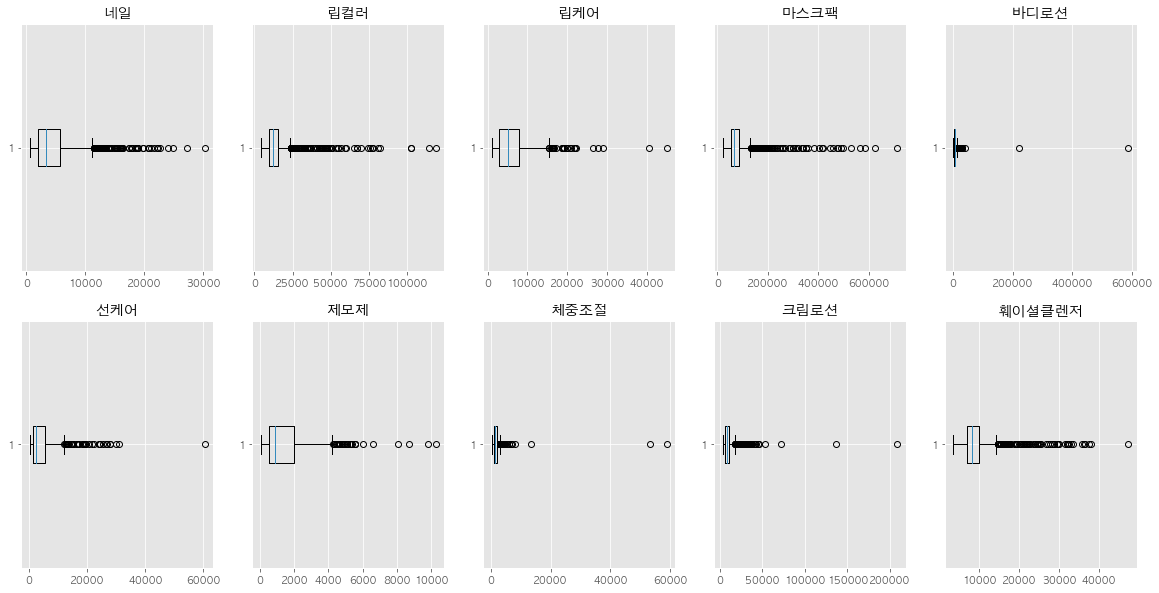

In [26]:
seoul_date_cat=gs_seoul.groupby(['date.gs','cat.gs']).sum().reset_index()

plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
cat=seoul_date_cat['cat.gs'].unique().tolist()
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.title(cat[i-1])
    plt.boxplot(seoul_date_cat[seoul_date_cat['cat.gs']==cat[i-1]]['qty.gs'],vert=0)

In [27]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=1)

def data(x):
    clf.fit(x['qty.gs'].values.reshape(-1,1))
    x['predict'] = clf.predict(x['qty.gs'].values.reshape(-1,1))

In [28]:
is_0 = gs_seoul['cat.gs']=='마스크팩'
is_1 = gs_seoul['cat.gs']=='립컬러'
is_2 = gs_seoul['cat.gs']=='훼이셜클렌저'
is_3 = gs_seoul['cat.gs']=='크림로션'
is_4 = gs_seoul['cat.gs']=='립케어'
is_5 = gs_seoul['cat.gs']=='바디로션'
is_6 = gs_seoul['cat.gs']=='선케어'
is_7 = gs_seoul['cat.gs']=='네일'
is_8 = gs_seoul['cat.gs']=='체중조절'
is_9 = gs_seoul['cat.gs']=='제모제'
a = gs_seoul[is_0]
b = gs_seoul[is_1]
c = gs_seoul[is_2]
d = gs_seoul[is_3]
e = gs_seoul[is_4]
f = gs_seoul[is_5]
g = gs_seoul[is_6]
h = gs_seoul[is_7]
i = gs_seoul[is_8]
j = gs_seoul[is_9]

In [29]:
data(a)
data(b)
data(c)
data(d)
data(e)
data(f)
data(g)
data(h)
data(i)
data(j)

In [30]:
print (a[a['predict'] == -1]['qty.gs'].min())
print (b[b['predict'] == -1]['qty.gs'].min())
print (c[c['predict'] == -1]['qty.gs'].min())
print (d[d['predict'] == -1]['qty.gs'].min())
print (e[e['predict'] == -1]['qty.gs'].min())
print (f[f['predict'] == -1]['qty.gs'].min())
print (g[g['predict'] == -1]['qty.gs'].min())
print (h[h['predict'] == -1]['qty.gs'].min())
print (i[i['predict'] == -1]['qty.gs'].min())
print (j[j['predict'] == -1]['qty.gs'].min())

2955
511
474
511
328
365
292
365
219
219


In [31]:
a['qty.gs'] = a['qty.gs'].apply(lambda x :2955 if x>2955 else x)
b['qty.gs'] = b['qty.gs'].apply(lambda x :511 if x>511 else x)
c['qty.gs'] = c['qty.gs'].apply(lambda x :474 if x>474 else x)
d['qty.gs'] = d['qty.gs'].apply(lambda x :511 if x >511 else x)
e['qty.gs'] = e['qty.gs'].apply(lambda x :328 if x>328 else x)
f['qty.gs'] = f['qty.gs'].apply(lambda x :365 if x>365 else x)
g['qty.gs'] = g['qty.gs'].apply(lambda x :292 if x>292 else x)
h['qty.gs'] = h['qty.gs'].apply(lambda x :365 if x>365 else x)
i['qty.gs'] = i['qty.gs'].apply(lambda x :219 if x>219 else x)
j['qty.gs'] = j['qty.gs'].apply(lambda x :219 if x>219 else x)

In [32]:
ab = a.append(b)
abc = ab.append(c)
abcd = abc.append(d)
abcde = abcd.append(e)
abcdef = abcde.append(f)
abcdefg = abcdef.append(g)
abcdefgh = abcdefg.append(h)
abcdefghi = abcdefgh.append(i)
abcdefghij = abcdefghi.append(j)
gs_seoul_outlier = abcdefghij

In [33]:
# 아웃라이어가 제거
gs_seoul = gs_seoul_outlier[gs_seoul_outlier['predict'] == 1]

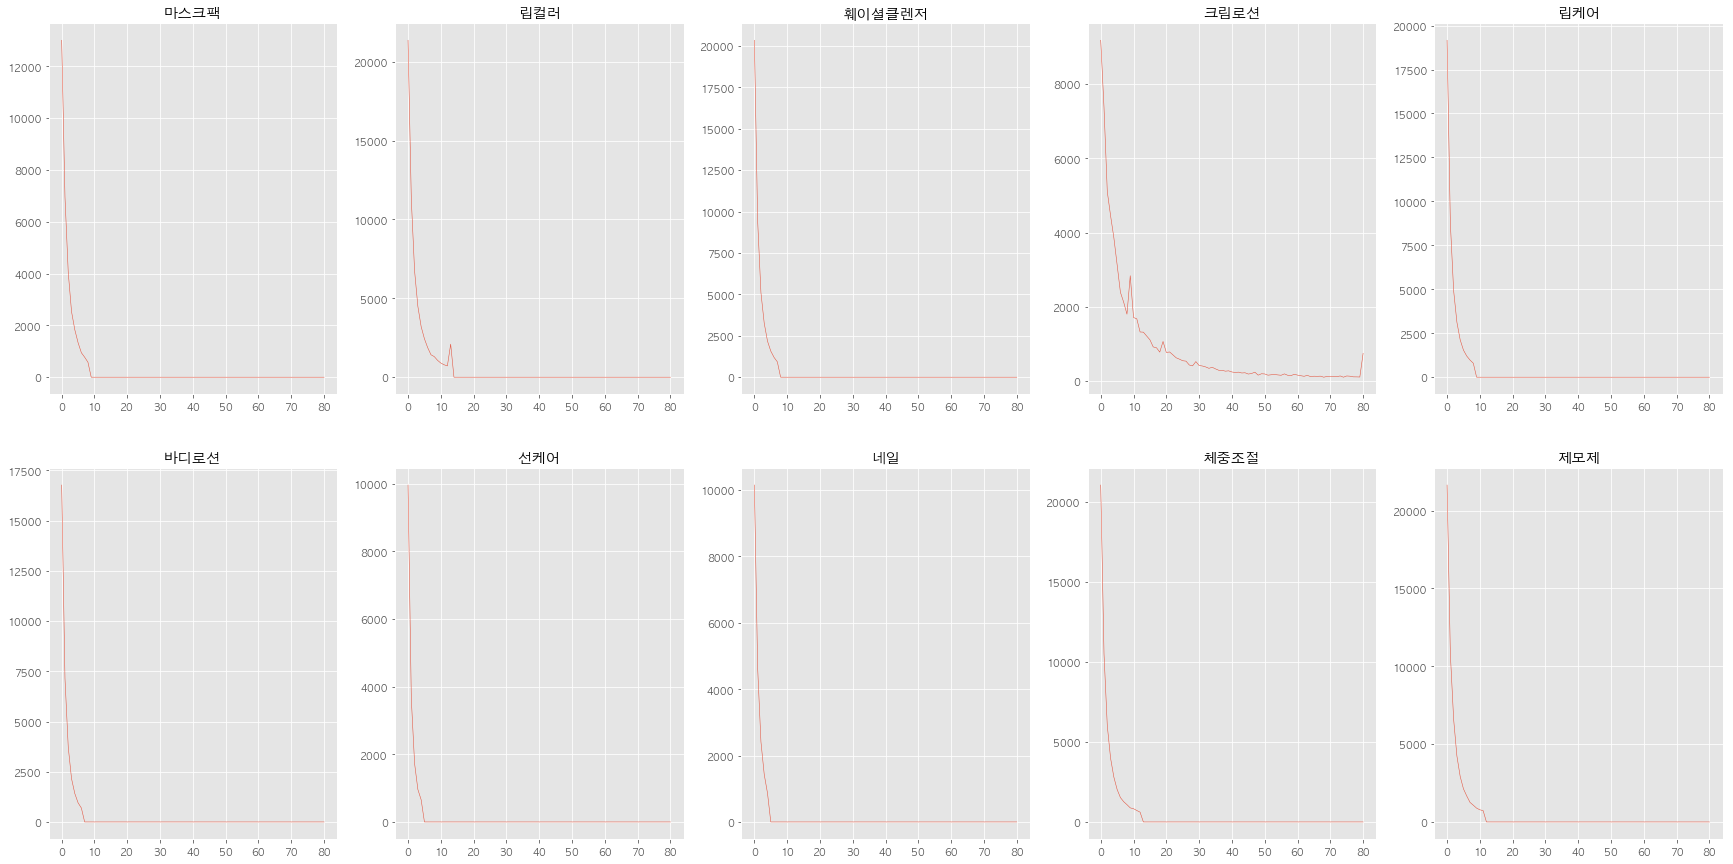

In [34]:
# 아웃라이너 제거 후
name = pd.Series(['마스크팩','립컬러','훼이셜클렌저','크림로션','립케어',                  
                  '바디로션','선케어','네일','체중조절','제모제'])

plt.rcParams["figure.figsize"] = (30,15)
plt.figure()
gs_seoul_count = gs_seoul.groupby(['qty.gs','cat.gs'])['cat.gs'].count().unstack().reset_index().fillna(0)
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.title(name[i-1])
    #plt.text(250,10000,'왜도: ')
    #plt.text(250,8500,'첨도: ')
    #plt.text(300,10000, gs_seoul_count_skew.iloc[i,1])
    #plt.text(300,8500, gs_seoul_count_kurt.iloc[i,1])
    value=gs_seoul_count.iloc[:,i]
    plt.plot(value)

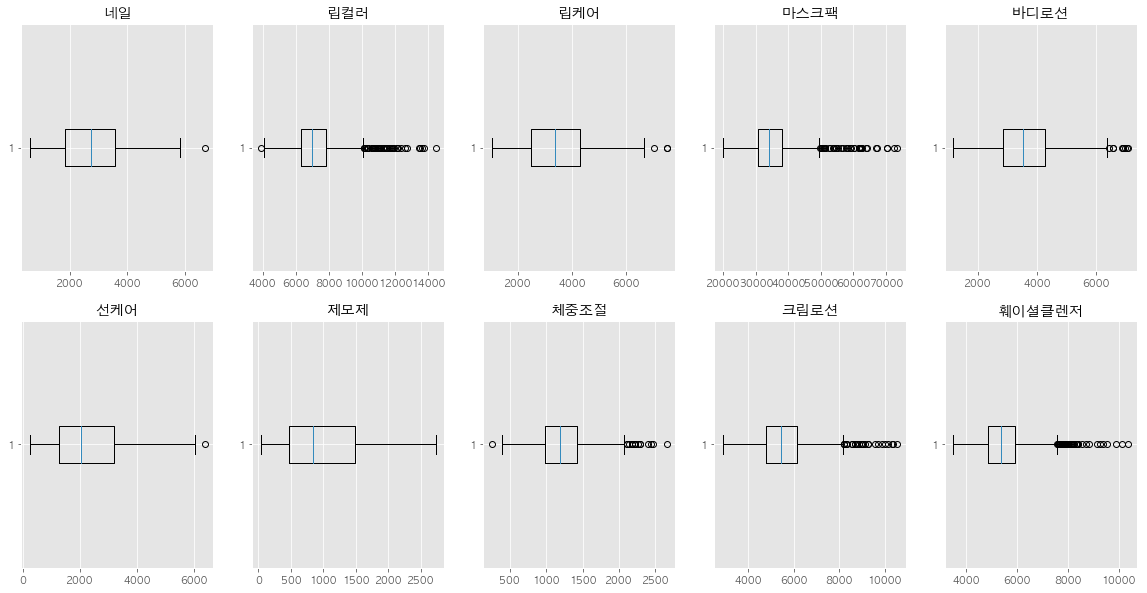

In [35]:
# 아웃라이너 제거 후
seoul_date_cat=gs_seoul.groupby(['date.gs','cat.gs']).sum().reset_index()

plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
cat=seoul_date_cat['cat.gs'].unique().tolist()
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.title(cat[i-1])
    plt.boxplot(seoul_date_cat[seoul_date_cat['cat.gs']==cat[i-1]]['qty.gs'],vert=0)

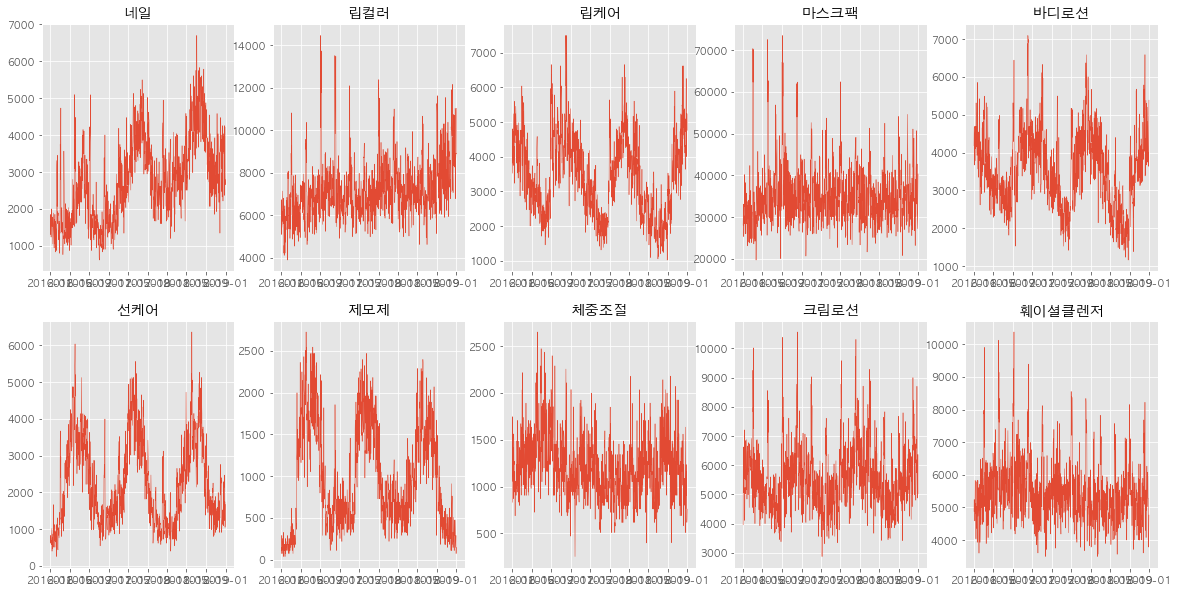

In [36]:
# 아웃라이너 제거 후
seoul_date_cat=gs_seoul.groupby(['date.gs','cat.gs']).sum()
seoul_date_cat1=seoul_date_cat.reset_index()
seoul_date_cat2=seoul_date_cat1.copy()
seoul_date_cat2=seoul_date_cat2.set_index(['date.gs','cat.gs'])['qty.gs'].unstack()
seoul_date_cat3=seoul_date_cat2.reset_index()

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 0.5
plt.figure()
cat=seoul_date_cat1['cat.gs'].unique().tolist()
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.title(cat[i-1])
    plt.plot(seoul_date_cat3['date.gs'],seoul_date_cat3.iloc[:,i])

In [42]:
gs_seoul_outlier = gs_seoul.groupby(['date.gs','reg_02.gs','cat.gs'])['qty.gs'].sum().unstack().reset_index().fillna('0')
gs_seoul_outlier['마스크팩']=gs_seoul_outlier['마스크팩'].astype(float)
gs_seoul_outlier['립컬러']=gs_seoul_outlier['립컬러'].astype(float)
gs_seoul_outlier['훼이셜클렌저']=gs_seoul_outlier['훼이셜클렌저'].astype(float)
gs_seoul_outlier['크림로션']=gs_seoul_outlier['크림로션'].astype(float)
gs_seoul_outlier['립케어']=gs_seoul_outlier['립케어'].astype(float)
gs_seoul_outlier['선케어']=gs_seoul_outlier['선케어'].astype(float)
gs_seoul_outlier['바디로션']=gs_seoul_outlier['바디로션'].astype(float)
gs_seoul_outlier['네일']=gs_seoul_outlier['네일'].astype(float)
gs_seoul_outlier['체중조절']=gs_seoul_outlier['체중조절'].astype(float)
gs_seoul_outlier['제모제']=gs_seoul_outlier['제모제'].astype(float)

In [43]:
#네일 립컬러
#립케어
#마스크팩 바디로션 체중조절 크림로션
#선케어 제모제 훼이셜클렌저

In [44]:
# 상품 합치기. ppt에 넣을떄는 EDA할떄 그린 판매량 시계열 데이터 그래프 넣고 설명하기면 될거 같습니다.
gs_seoul_outlier['스테디셀러'] = gs_seoul_outlier['마스크팩']+gs_seoul_outlier['바디로션']+gs_seoul_outlier['체중조절'] + gs_seoul_outlier['크림로션']
gs_seoul_outlier['우상향상품'] = gs_seoul_outlier['네일']+gs_seoul_outlier['립컬러']
gs_seoul_outlier['계절성(가을,겨울)'] = gs_seoul_outlier['립케어']
gs_seoul_outlier['계절성(여름)'] = gs_seoul_outlier['선케어']+gs_seoul_outlier['제모제']+gs_seoul_outlier['훼이셜클렌저']

In [45]:
gs_seoul_outlier=gs_seoul_outlier.drop(['마스크팩'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['립컬러'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['훼이셜클렌저'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['크림로션'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['립케어'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['선케어'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['바디로션'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['네일'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['체중조절'], axis=1)
gs_seoul_outlier=gs_seoul_outlier.drop(['제모제'], axis=1)

In [53]:
# lala는 매장 갯수가 너무 적어서 서울 통합으로 하기로함
df = gs_seoul_outlier.groupby(['date.gs'])['스테디셀러','우상향상품','계절성(가을,겨울)','계절성(여름)'].sum().reset_index()

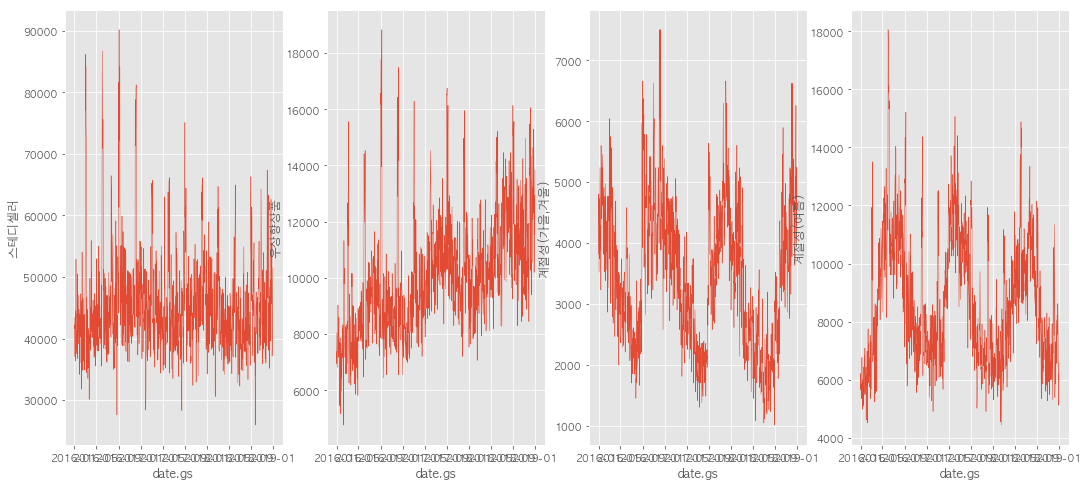

In [54]:
figure, ((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(18,8)
graph_num = [ax1, ax2, ax3, ax4]
    
list_ = ['스테디셀러','우상향상품','계절성(가을,겨울)','계절성(여름)']
len_ = len(list_)
for i in range(len_):
    sns.lineplot(data = df, x = 'date.gs', y = list_[i],ax = graph_num[i])

In [55]:
# 데이터 저장
df.to_csv('/Users/hankiho/Desktop/la_seoul.csv', index = False, encoding = "utf-8-sig")